In [1]:
'''
victory_status
opening_name
rated
turns
opening_ply
rating_diff
base_time
'''
from google.colab import files
import pandas as pd

# Upload your CSV
uploaded = files.upload()
file_name = 'games.csv'  # change if needed
df = pd.read_csv(file_name)

display(df.head())
df.info()


Saving games.csv to games.csv


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [2]:
import numpy as np

# Standardize column names
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(r'[^0-9a-zA-Z]+','_',regex=True)
              .str.strip('_')
)

# Compute simple helper features
if {'white_rating','black_rating'}.issubset(df.columns):
    df['rating_diff'] = pd.to_numeric(df['white_rating'], errors='coerce') - pd.to_numeric(df['black_rating'], errors='coerce')

if 'increment_code' in df.columns:
    df['base_time'] = df['increment_code'].astype(str).str.extract(r'(\d+)\+')[0].astype(float)

for col in ['created_at','last_move_at']:
    if col in df.columns:
        df[col+'_dt'] = pd.to_datetime(df[col], unit='ms', errors='coerce')

display(df.head())


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff,base_time,created_at_dt,last_move_at_dt
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,15.0,2017-08-31 20:06:40,2017-08-31 20:06:40
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,5.0,2017-08-30 21:53:20,2017-08-30 21:53:20
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4,5.0,2017-08-30 21:53:20,2017-08-30 21:53:20
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15,20.0,2017-08-30 16:20:00,2017-08-30 16:20:00
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54,30.0,2017-08-29 18:06:40,2017-08-29 18:06:40


In [ ]:
print("Rows × Cols:", df.shape)
print("Average white rating:", round(df['white_rating'].mean(),1))
print("Average black rating:", round(df['black_rating'].mean(),1))
print("Average game length (turns):", round(df['turns'].mean(),1))
print("\nTop openings:")
print(df['opening_name'].value_counts().head(5))
print("\nVictory status counts:")
print(df['victory_status'].value_counts().head())


Rows × Cols: (20058, 20)
Average white rating: 1596.6
Average black rating: 1588.8
Average game length (turns): 60.5

Top openings:
opening_name
Van't Kruijs Opening                368
Sicilian Defense                    358
Sicilian Defense: Bowdler Attack    296
French Defense: Knight Variation    271
Scotch Game                         271
Name: count, dtype: int64

Victory status counts:
victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64


In [ ]:
work = df.copy()

if 'turns' in work.columns:
    work = work[work['turns'].between(5,200)]
for c in ['white_rating','black_rating']:
    if c in work.columns:
        work[c] = pd.to_numeric(work[c], errors='coerce').clip(600,3000)
if {'white_rating','black_rating'}.issubset(work.columns):
    work['rating_diff'] = work['white_rating'] - work['black_rating']

work = work.dropna(subset=['white_rating','black_rating'])
print("Rows after cleaning:", len(work))


Rows after cleaning: 19693


In [ ]:
# Define rating bins and labels
bins = [0,1200,1600,2000,9999]
labels = ['Beginner','Intermediate','Advanced','Expert']

work['rating_group'] = pd.cut(work['white_rating'], bins=bins, labels=labels, include_lowest=True)
print(work['rating_group'].value_counts())


rating_group
Intermediate    9101
Advanced        7307
Expert          1765
Beginner        1520
Name: count, dtype: int64


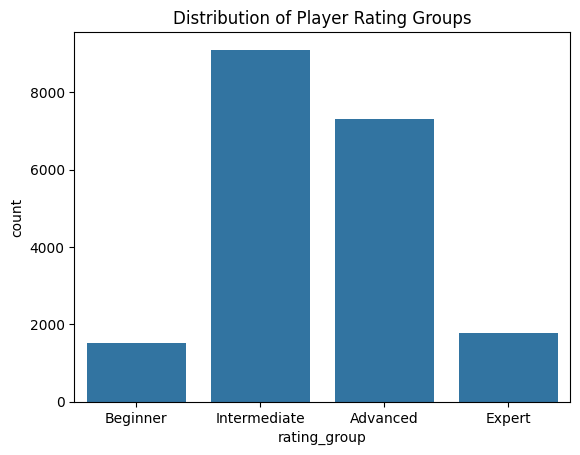

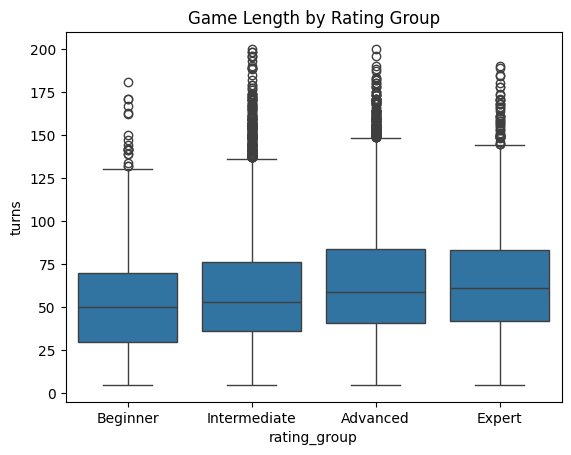

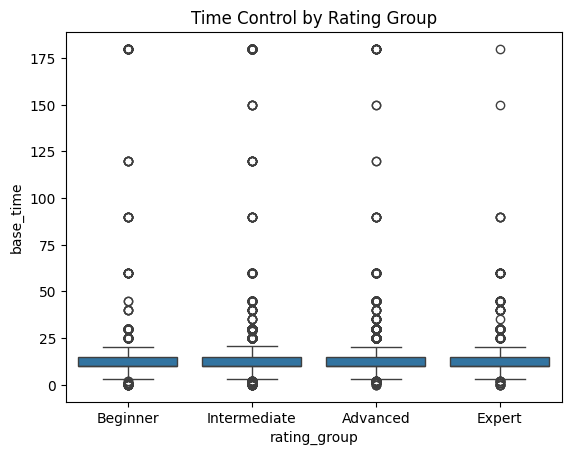

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating_group', data=work, order=['Beginner','Intermediate','Advanced','Expert'])
plt.title("Distribution of Player Rating Groups")
plt.show()

if 'turns' in work.columns:
    sns.boxplot(x='rating_group', y='turns', data=work, order=['Beginner','Intermediate','Advanced','Expert'])
    plt.title("Game Length by Rating Group")
    plt.show()

if 'base_time' in work.columns:
    sns.boxplot(x='rating_group', y='base_time', data=work, order=['Beginner','Intermediate','Advanced','Expert'])
    plt.title("Time Control by Rating Group")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# use opening_name instead of opening_eco
cat = [c for c in ['victory_status','opening_name','rated'] if c in work.columns]
num = [c for c in ['turns','opening_ply','rating_diff','base_time'] if c in work.columns]

X = work[cat + num].copy()
y = work['rating_group'].astype(str)

mask = y.notna()
X, y = X.loc[mask], y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
    ('num', StandardScaler(), num)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('pre', preprocess),
    ('lr', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

model.fit(X_train, y_train)
print("Model trained using opening_name as a categorical feature.")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model trained using opening_name as a categorical feature.


              precision    recall  f1-score   support

    Advanced      0.546     0.564     0.555      1462
    Beginner      0.456     0.086     0.144       304
      Expert      0.634     0.221     0.328       353
Intermediate      0.599     0.741     0.663      1820

    accuracy                          0.578      3939
   macro avg      0.559     0.403     0.422      3939
weighted avg      0.572     0.578     0.553      3939



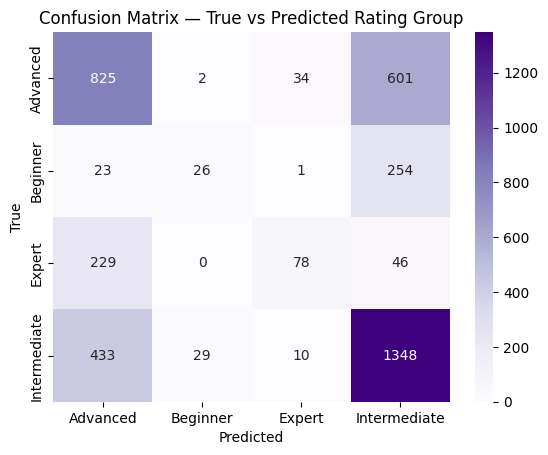

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix — True vs Predicted Rating Group")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Recover feature names
ohe = model.named_steps['pre'].named_transformers_['cat']
feature_names = list(ohe.get_feature_names_out(cat)) + num
coefs = model.named_steps['lr'].coef_

# Build labeled dataframe
coef_df = pd.DataFrame(coefs.T, index=feature_names, columns=model.classes_)
coef_df = coef_df.reset_index().rename(columns={'index':'Feature'})

# Add absolute strength for sorting
coef_df['Overall Influence (abs value)'] = coef_df.iloc[:,1:].abs().max(axis=1)

# Sort by most influential
coef_df = coef_df.sort_values('Overall Influence (abs value)', ascending=False)

# Rename columns for clarity
coef_df.columns = ['Feature',
                   'Effect for Beginner (+ → more likely)',
                   'Effect for Intermediate (+ → more likely)',
                   'Effect for Advanced (+ → more likely)',
                   'Effect for Expert (+ → more likely)',
                   'Overall Influence (abs value)']

# Show top 20
display(coef_df.head(20))

print("""
🔍  Interpretation:
- Values are **logistic regression coefficients**, not percentages.
- Positive = increases likelihood of that rating group.
- Negative = decreases likelihood.
- Bigger absolute value = stronger influence.
""")


,Feature,Effect for Beginner (+ → more likely),Effect for Intermediate (+ → more likely),Effect for Advanced (+ → more likely),Effect for Expert (+ → more likely),Overall Influence (abs value)
439,opening_name_Indian Game: Spielmann-Indian,-0.594436,-0.406603,2.256477,-1.255439,2.256477
1309,opening_name_Sicilian Defense: Wing Gambit | ...,-0.538949,-0.369229,2.078364,-1.170186,2.078364
20,opening_name_Alekhine Defense: Mokele Mbembe,-0.653453,1.812607,-0.707397,-0.451757,1.812607
425,opening_name_Indian Game,0.838232,-1.790808,1.049617,-0.097041,1.790808
229,opening_name_English Opening: Anglo-Indian Def...,-0.805449,-0.156673,1.766859,-0.804737,1.766859
495,opening_name_Italian Game: Two Knights Defense...,-0.938595,1.733721,-1.188538,0.393412,1.733721
502,opening_name_Italian Game: Two Knights Defense...,-0.914707,-0.039684,-0.755076,1.709468,1.709468
616,opening_name_King's Pawn Game: Damiano Defense,-1.343732,1.637935,-0.870199,0.575995,1.637935
632,opening_name_King's Pawn Game: Wayward Queen A...,-1.036691,1.605425,-1.500608,0.931874,1.605425
561,opening_name_King's Indian Attack: French Vari...,-0.674707,-0.221225,1.584705,-0.688773,1.584705



🔍  Interpretation:
- Values are **logistic regression coefficients**, not percentages.
- Positive = increases likelihood of that rating group.
- Negative = decreases likelihood.
- Bigger absolute value = stronger influence.

